# Задание 21 - Уравнение Кеплера
[Каханер–Моулер–Нэш] Уравнение Кеплера для вычисления орбиты имеет вид$$
M=E-\varepsilon\sin E,
$$где $M$ – средняя аномалия, $E$ – эксцентрическая аномалия, $\varepsilon$ – эксцентриситет орбиты. Пусть $M=24.851090$, $\varepsilon=0.1$.

1. Изобразите полученную орбиту.
2. С помощью функции scipy.optimize.brentq найдите $E$.
3. Вычислите $E$ с помощью формулы
$$
  E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM),
$$
где $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$.
4. Найдите $E$ по предыдущей формуле, используя равенство  
$$
  J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
$$
5. Проведите сравнение вычислительных затрат и точности результатов, полученных каждым из трех способов.


# Вывод уравнения Кеплера

Эллипс — это сплюснутая на величину $\sqrt{1-e^2}$ окружность. Здесь e — эксцентриситет.
Площадь эллипса равна $S=\pi a^2\sqrt{1-e^2}$ где a — большая полуось.
Согласно второму закону Кеплера, который гласит, что площадь, заметаемая радиус-вектором небесного тела пропорциональна времени, можно написать $S(t)=\pi $ $a^2\sqrt{1-e^2}$ ${t-t_0}\over T$ где T — период обращения, t — текущее время, t0 — момент времени прохождения перигелия (ближайшей к Солнцу точки орбиты).

Найдем теперь зависимость этой площади от положения небесного тела на орбите, то есть от величины радиус-вектора r и истинной аномалии — угла между перигелием и небесным телом, если смотреть с Солнца.

Для этого введем дополнительную переменную — эксцентрическую аномалию E.
Направим ось x от Солнца (начала координат), которое находится в одном из фокусов эллипса, в сторону перигелия по линии апсид (прямой, соединяющей перицентр с апоцентром).
Создадим также вспомогательную окружность с радиусом, равным большой полуоси эллипса.
Абсцисса небесного тела в точке $P$ будет равна $x=acos(E)-ae$ ордината будет, соответственно, равна $y=a\sin(E)\sqrt{1-e^2}$
Таким образом, получаем
$x=r\cos(v)=a(\cos(E)-e)$ 
$y=r\sin(v)=a\sin(E)\sqrt{1-e^2}$

Для вычисления площади $S$ рассмотрим вспомогательные фигуры: 

сектор окружности $P'-O-Per$: $S1=a^2*\frac{E}{2}$

Сектор эллипса $P-O-Per$: $S2=S1*\sqrt{1-e^2}$

Треугольник $O-O'-P$: $S3=\frac{yae}{2}=\frac{1}{2}a^2e\sin(E)*\sqrt{1-e^2}$

Сектор $-O'-Per$: $S=S2-S3$

Отсюда, прощадь $S$ равна: $S(t)=\frac{a^2}{2}\sqrt{1-e^2}(E-esin(E))$

Сравнивая это выражение с выведенным ранее из второго закона Кеплера, получаем: $M(t)=E(t)-e\sin(E(t))$
где $M(t)=2\pi \frac{t-t_0}{T}$

# Построение орбиты

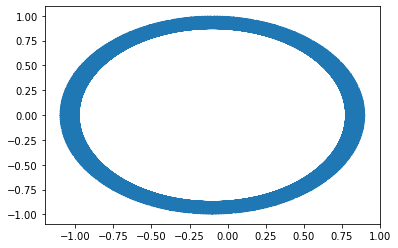

In [1]:
from numpy import*
from matplotlib.pyplot import*
from math import*
M=24.851090
e=0.1
a=1
N=359
E=[i for i in arange(0,N)]
x=array([a*(cos(E1)-e) for E1 in E])
y=array([a*sin(E1)*sqrt(1-e**2) for E1 in E])
plot(x, y)
pass

# Найдём E с помощью scipy.optimize.brentq:

In [2]:
from scipy import optimize, special
def f(E):
    return E-e*sin(E)-M
k=optimize.brentq(f,0,25)
print(k)

24.820357182542914


# Найдём E с помощью формулы
$$
 E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM),
$$
           где $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$.

In [3]:
E = list()
for i in range(1, 10):
    E.append(1/i*special.jv(i, e)*sin(i*M))
t=M + 2*sum(E)
print(t)

24.822653088245808


# Найдём E с помощью предыдущей формулы и равенства:
 $$
 J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
 $$
    



In [4]:
E1 = list()
for i in range(1, 10):
    Bessel = sum([((-1)**j*((i*e)/2)**(2*j+i))/(factorial(j)*factorial(i+j)) for j in arange(10)])
    E1.append(1/i*Bessel*sin(i*M))
t=M + 2*sum(E1)
print(t)

24.820357182559754


# Вывод
1. Результат 1го и 3го способа схожи, результат второго способа значительно отличается
2. Все три способа работают с примерно одинаковым быстродействием